#### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from PIL import Image
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

#### Importing Dataset

In [2]:
data= pd.read_csv(r'IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Exporting Dataset:

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Checking any Null values in Dataset

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Calculate Summary Satistics

In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.duplicated().value_counts()

False    147
True       3
Name: count, dtype: int64

In [10]:
data.drop_duplicates(subset=None, inplace=True)
data.shape

(147, 5)

#### Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lbl= LabelEncoder()
data['species']=lbl.fit_transform(data['species'])

In [13]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Preprocessing Data with Standard Scaller

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scd= StandardScaler()
Stnd=scd.fit_transform(data)
Stnd

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001, -1.2394597 ],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001, -1.2394597 ],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001, -1.2394597 ],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001, -1.2394597 ],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001, -1.2394597 ],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176, -1.2394597 ],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089, -1.2394597 ],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001, -1.2394597 ],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001, -1.2394597 ],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914, -1.2394597 ],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001, -1.2394597 ],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001, -1.2394597 ],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914, -1.2394597 ],
       [-1.88371017, -0.12808217, -1.5

#### Corellation matrix and Heatmap

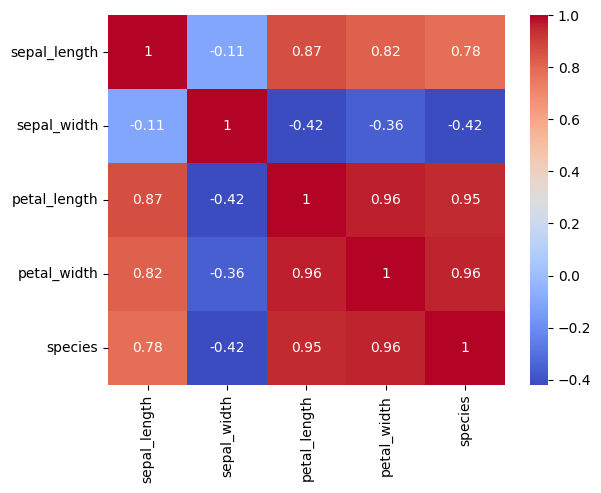

In [16]:
corellation=data.corr()
sns.heatmap(corellation,annot=True,cmap="coolwarm")
plt.show()

#### Assigning Dependent and Independent Variables:

In [17]:
x=data.drop(['species'],axis=1)
y=data['species']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(147, 4)
(147,)


#### Splitting the dataset into Training and Testing Dataset

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)
display(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

(102, 4)

(102,)

(45, 4)

(45,)

In [19]:
col_names=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'species']

In [20]:
feature_cols=['sepal_length','sepal_width', 'petal_length', 'petal_width']

In [21]:
print(data.shape)

(147, 5)


In [22]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Evaluation

In [23]:
def class_eval(y_test,y_pred):
    CM=confusion_matrix(y_test,y_pred)
    AS=accuracy_score(y_test,y_pred)
    CR=classification_report(y_test,y_pred)
    
    print(CM)
    print(AS)
    print(CR)
    
def mscore(model):
    print("Training score", model.score(x_train,y_train))
    print("Testing score",model.score(x_test,y_test))

#### Heading

#### Implementing Logistic Regression

#### Fitting the model(logistical Regression)

In [58]:
model= LogisticRegression(solver='liblinear', max_iter=100)
model.fit(x_train, y_train)
y_pred_lr=model.predict(x_test)
mscore(model)

Training score 0.9509803921568627
Testing score 0.9333333333333333


In [25]:
y_pred_lr=model.predict(x_test)
y_pred_lr

array([2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1,
       1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2,
       1])

In [26]:
conf_mat=metrics.confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix :', conf_mat)
accuracy_score=metrics.accuracy_score(y_test, y_pred_lr)
print('Accuracy Score:', accuracy_score)
print('Accuracy in % :', int(accuracy_score*100), '%')
classification_report=metrics.classification_report(y_test, y_pred_lr)
print('classification Report: ', classification_report)

Confusion Matrix : [[13  0  0]
 [ 0 16  3]
 [ 0  0 13]]
Accuracy Score: 0.9333333333333333
Accuracy in % : 93 %
classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.84      0.91        19
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



#### Evaluation

<Axes: xlabel='species', ylabel='sepal_length'>

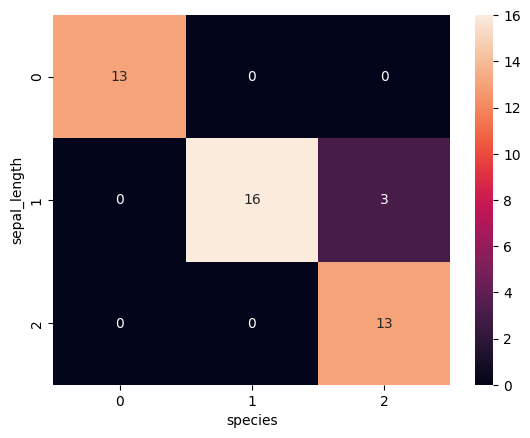

In [27]:
conf_mat=pd.crosstab(y_test, y_pred_lr, rownames=['sepal_length'],
        colnames=['species'])
sns.heatmap(conf_mat, annot=True)


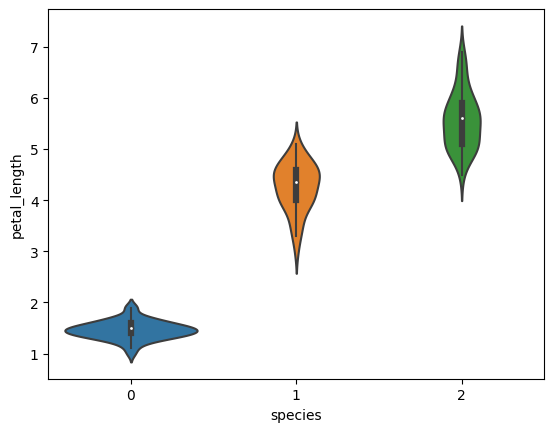

In [28]:
sns.violinplot(x="species", y="petal_length", data=data)
plt.show()

#### Implementing DecisionTree Classifire

#### Fitting the model (DecisionTree Classifire)

In [57]:
Dmodel= DecisionTreeClassifier(criterion='entropy', random_state=42, max_features='sqrt', max_depth=15, min_samples_leaf=5, min_samples_split=10)
Dmodel.fit(x_train,y_train)
mscore(Dmodel)

Training score 0.9803921568627451
Testing score 0.9111111111111111


In [30]:
y_pred_dt=Dmodel.predict(x_test)
print('y_pred:', y_pred_dt)

y_pred: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


#### Evaluation

<Axes: xlabel='Species', ylabel='petal_length'>

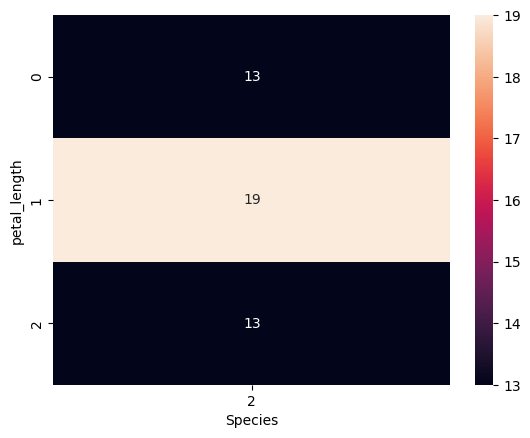

In [31]:
conf_mat=pd.crosstab(y_test, y_pred_dt, rownames=['petal_length'], 
     colnames=['Species'])
sns.heatmap(conf_mat, annot=True)

In [32]:
dtC = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42, criterion='gini')
dtC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [33]:
clf=DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=5, random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

0.28888888888888886


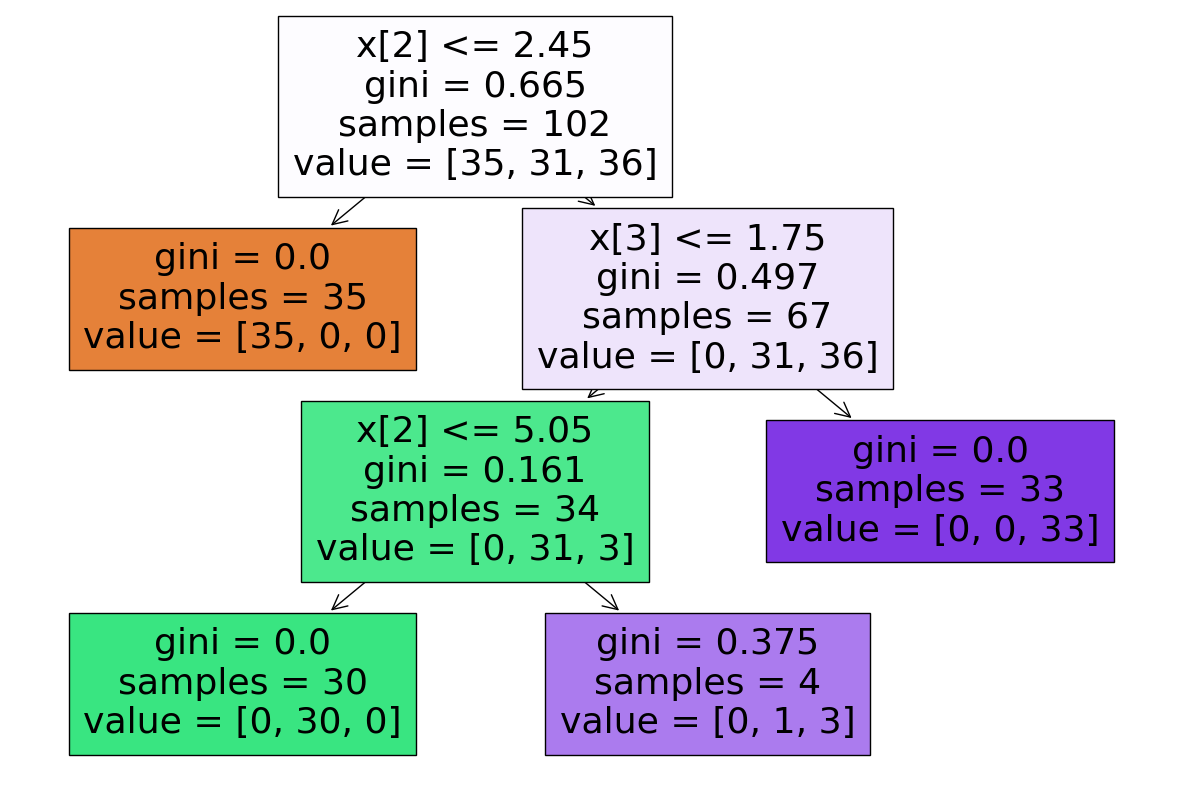

In [34]:
plt.figure(figsize=(15, 10)) 
tree.plot_tree(clf, filled=True) 
ypred = clf.predict(x_test) 
score = metrics.accuracy_score(y_test, y_pred_dt) 
print(score)
plt.show()

#### Implementing KNN Classifire

#### Fitting the model(KNN Classifire)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [60]:
KNmodel= KNeighborsClassifier()
KNmodel.fit(x_train,y_train)
mscore(KNmodel)

Training score 0.9901960784313726
Testing score 0.9555555555555556


In [37]:
y_pred_KNN=KNmodel.predict(x_test)
print('y_pred:', y_pred_KNN)

y_pred: [2 1 1 1 1 2 0 0 2 0 1 2 0 0 0 1 0 1 2 2 1 1 1 0 1 1 2 2 0 2 1 2 1 0 0 1 2
 2 0 1 1 0 1 2 1]


#### Evaluation

<Axes: xlabel='Species', ylabel='petal_width'>

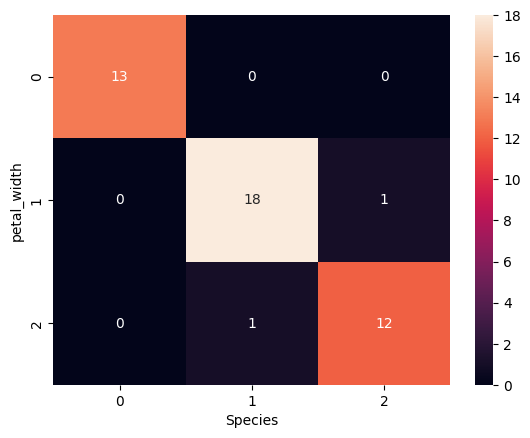

In [38]:
conf_mat=pd.crosstab(y_test, y_pred_KNN, rownames=['petal_width'], 
     colnames=['Species'])
sns.heatmap(conf_mat, annot=True)

##### Creat visualizing chart

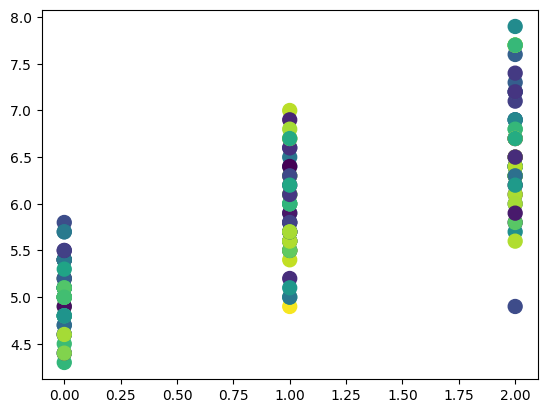

In [39]:
x=data['species']
y=data['sepal_length']
colors=np.random.rand(147)
plt.scatter(x,y, s=100, c=colors)
plt.show()

In [40]:
KNNc = KNeighborsClassifier(n_neighbors=10)
KNNc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
KNlf=KNeighborsClassifier(n_neighbors=15)
KNlf.fit(x_test, y_test)

KNeighborsClassifier(n_neighbors=15)

### Conclusion:

##### Comparing the "Testing Score" of the above performed model, i.e Logistical Regrassion, DecissionTree Classifire & KNN Classifire, the highest Testing Score is : 0.9555 -----> which belongs to 'KNN Classifire'. So KNN Classifire is Selected as  'Best Model'